In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_45600_Z')

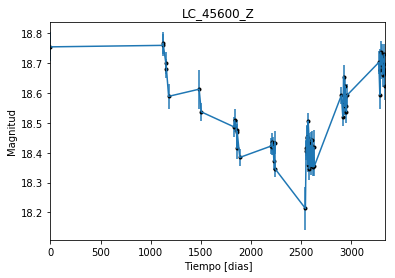

In [3]:
data = np.genfromtxt('LC_45600_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_45600_Z')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

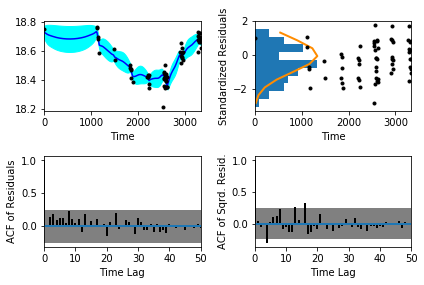

In [25]:
sample.assess_fit()

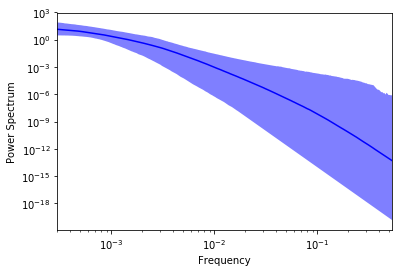

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_45600_Z')

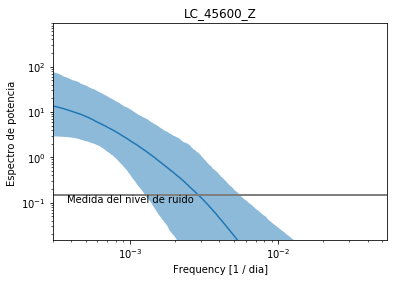

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_45600_Z')

Text(0.5,1,'Prediccion , valor esperado LC_45600_Z')

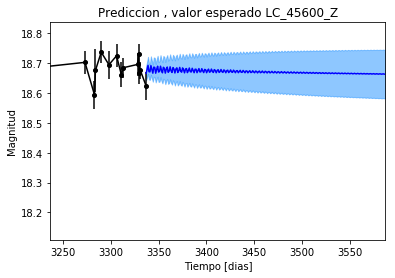

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_45600_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_45600_Z')

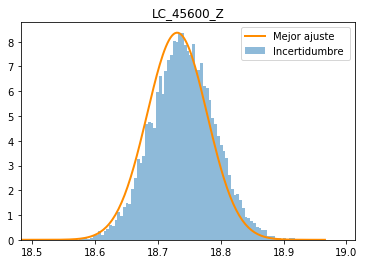

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_45600_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_45600_Z')

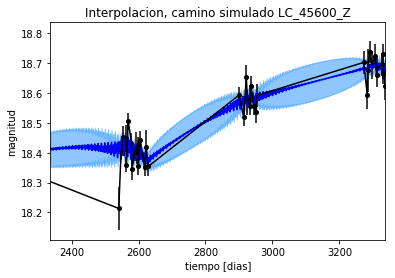

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_45600_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_45600_Z')

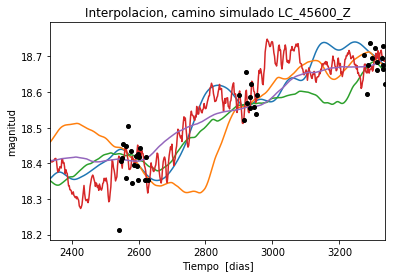

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_45600_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 684.299168439
Median: 0.009703065553
Standard deviation: 0.1967231996
68% credibility interval: [ 0.00081861  0.19890382]
95% credibility interval: [  3.33314886e-04   7.63926712e-01]
99% credibility interval: [  3.08133034e-04   9.99430060e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 620.053184446
Median: 0.00113558558762
Standard deviation: 0.064988843677
68% credibility interval: [ 0.00039112  0.01388913]
95% credibility interval: [ 0.00031222  0.16605249]
99% credibility interval: [  3.01818570e-04   5.30641929e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 441.201033291
Median: 0.0151458801419
Standard devi

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1154.06603001
Median: 120.087903332
Standard deviation: 1.56923224032
68% credibility interval: [ 118.3108058   121.17136313]
95% credibility interval: [ 115.95660686  121.82471818]
99% credibility interval: [ 114.0196624   123.97430999]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 724.172195048
Median: 0.642949886192
Standard deviation: 2.00104296553
68% credibility interval: [ 0.0545514   3.50765512]
95% credibility interval: [ 0.01246199  6.86774177]
99% credibility interval: [ 0.00999191  8.99053491]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 449.562665317
Median: 0.183755909046
Standard deviation: 7.26323131681
68% credibility interval: [ 0.00602341  3.89315635]
95% credibility interval: [  3.76659977e-0

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20018.943059
Median: 7.55267165535e-46
Standard deviation: 3.90586002988e+18
68% credibility interval: [  4.25011202e-80   1.47480998e-13]
95% credibility interval: [  6.07314390e-115   1.40541264e+001]
99% credibility interval: [  1.74119840e-126   1.41408819e+015]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1723.75248462
Median: 18.5990066366
Standard deviation: 0.0943978178332
68% credibility interval: [ 18.52226574  18.68390803]
95% credibility interval: [ 18.42885831  18.8017258 ]
99% credibility interval: [ 18.33813379  18.9373033 ]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 351.970819932
Median: 0.000344139829404
Standard deviation: 0.207246474747
68% credibility interval: [ 0.          0.20761247]
95% credibility interval: [ 0.          0.79535768]
99% credibility interval: [ 0.          0.99414975]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 351.970819932
Median: 0.000344139829404
Standard deviation: 0.207246474747
68% credibility interval: [ 0.          0.20761247]
95% credibility interval: [ 0.          0.79535768]
99% credibility interval: [ 0.          0.99414975]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 707.289880865
Median: 0.0
Standard deviation: 0.000334226615862
68

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1154.06603001
Median: 120.087903332
Standard deviation: 1.56923224032
68% credibility interval: [ 118.3108058   121.17136313]
95% credibility interval: [ 115.95660686  121.82471818]
99% credibility interval: [ 114.0196624   123.97430999]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1377.16382609
Median: 0.0244884453689
Standard deviation: 0.0345267639199
68% credibility interval: [ 0.01359213  0.04983087]
95% credibility interval: [ 0.00832394  0.12035271]
99% credibility interval: [ 0.00638056  0.2172031 ]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3007.45077453
Median: 1.29234976577
Standard deviation: 0.199495420502
68% credibility interval: [ 1.11654718  1.51071455]
95% credibility interval: [ 0.96650533  1.74685435]
99% credibility interval: [ 0.87862977  1.90164551]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 397.692184122
Median: 2.68861124717e-05
Standard deviation: 0.0983677951593
68% credibility interval: [  4.58841844e-07   1.00488540e-03]
95% credibility interval: [  3.43757312e-09   6.75757789e-02]
99% credibility interval: [  6.93103934e-22   5.79250765e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 684.299168439
Median: (-0.0609661589172+0j)
Standard deviation: 1.79539882929
68% credibility interval: [-1.24974957+0.j         -0.00514350-0.04137279j]
95% credibility interval: [ -4.79989309e+00+0.j          -2.09427919e-03-0.00317865j]
99% credibility interval: [ -6.27960427e+00+0.j          -1.93605695e-03-0.00165886j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 620.053184446
Median: (-0.00713509467915+0j)
Standard deviation: 1.36469065226
68% credibility interval: [-0.08726795+0.05925798j -0.00245746+0.j        ]
95% credibility interval: [-1.04333859+1.80469683j -0.00196175+0.00525431j]
99% credibility interval: [ -3.33412157e+00+1.38822428j  -1.89638200e-03+0.j        ]
Posterior summary for parameter ar_ro